# ML Olympiad - QUALITY EDUCATION

ML Olympiad – Previsão das notas da prova do ENEM ([Link](https://www.kaggle.com/competitions/qualityeducation/data))

[Dicionário de dados](https://docs.google.com/spreadsheets/d/14C4lbQFEmUnIJN17gr01L8ikXsT27eHZ/edit?usp=sharing&ouid=101143319330377699057&rtpof=true&sd=true) (significado das colunas)

In [2]:
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype #Acrescentado
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn.model_selection import train_test_split, cross_validate
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
dados = pd.read_csv(r"C:\Users\gabri\OneDrive\Área de Trabalho\Data Science\qualityeducation\train.csv")
type(dados)

pandas.core.frame.DataFrame

In [4]:
dados.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,d7e73c5f-2db8-4089-9bee-d3a0e045f87f,1100023,Ariquemes,11,RO,31.0,F,0,1,1,...,B,A,A,B,A,A,C,A,B,B
1,668bf6e4-ddf7-4810-b31e-7d325e36de4d,3106200,Belo Horizonte,31,MG,23.0,F,1,3,1,...,A,A,A,B,A,A,C,A,B,B
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,3,1,...,B,A,B,C,B,B,D,A,B,B
3,baf409f9-ddc6-4e82-9a4b-b64b579cd105,2506301,Guarabira,25,PB,16.0,M,1,1,1,...,B,A,A,B,A,A,E,A,A,B
4,9fd415ac-3421-44ce-810e-599545c3c025,2304400,Fortaleza,23,CE,19.0,M,1,1,1,...,B,A,A,E,B,B,C,B,B,B


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311925 entries, 0 to 3311924
Columns: 118 entries, NU_INSCRICAO to Q025
dtypes: float64(16), int64(68), object(34)
memory usage: 2.9+ GB


In [21]:
dados.dropna()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,nota_Media,renda_familiar
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,3,1,...,B,C,B,B,D,A,B,B,502.375,"De R$ 2.495,01 até R$ 2.994,00."
6,cf31ebe2-85d0-4e10-be47-0ea9f49f9242,2111607,São Raimundo das Mangabeiras,21,MA,17.0,F,1,3,1,...,A,B,B,A,A,A,A,A,411.200,"Até R$ 998,00"
7,e27bdbb9-e320-476a-ba73-1cdd211c436d,3132404,Itajubá,31,MG,18.0,F,1,1,1,...,A,B,A,B,C,A,A,B,520.325,"De R$ 2.994,01 até R$ 3.992,00."
10,e054769b-4932-4df9-bc8e-bd65538a67fb,2408102,Natal,24,RN,19.0,M,1,3,1,...,B,C,A,B,E,A,E,B,543.700,"De R$ 5.988,01 até R$ 6.986,00."
14,dbd76c6e-2eb0-461a-a13f-4800ad0ea7a5,3502903,Araçoiaba da Serra,35,SP,17.0,F,1,1,1,...,B,B,B,A,E,A,B,B,526.125,"De R$ 2.994,01 até R$ 3.992,00."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311908,9bce1e90-42ac-4a06-9db0-d5bd9aff0963,2607901,Jaboatão dos Guararapes,26,PE,19.0,F,1,1,1,...,A,A,A,A,D,A,A,B,509.100,"Até R$ 998,00"
3311909,dbd3da80-a721-4b40-95da-6225b8d05df6,1702554,Augustinópolis,17,TO,18.0,M,1,3,1,...,A,B,A,A,C,A,A,B,452.425,"De R$ 1.497,01 até R$ 1.996,00."
3311917,f6b4d1fc-32fa-446b-96e8-91adc2583644,1500107,Abaetetuba,15,PA,17.0,F,1,3,1,...,A,B,B,A,C,A,A,A,464.350,"Até R$ 998,00"
3311920,5a7f3179-9134-446e-9f93-67a849cc66d0,3157807,Santa Luzia,31,MG,17.0,F,1,3,1,...,B,C,A,A,E,B,B,B,483.275,"De R$ 998,01 até R$ 1.497,00"


### Excluimos inscritos sem nota média

In [22]:
dados['nota_Media'] = ((dados['NU_NOTA_CN'] + dados['NU_NOTA_CH'] + dados['NU_NOTA_LC'] + dados['NU_NOTA_MT']) / 4)
dados['nota_Media'].dropna()

0          465.025
1          444.775
2          502.375
3          430.450
4          668.800
            ...   
3311917    464.350
3311920    483.275
3311921    523.925
3311922    492.675
3311924    631.150
Name: nota_Media, Length: 2405749, dtype: float64

In [8]:
nota_E = dados[(dados['nota_Media'] > 0) & (dados['nota_Media'] <= 200)]
nota_D = dados[(dados['nota_Media'] > 200) & (dados['nota_Media'] <= 400)]
nota_C = dados[(dados['nota_Media'] > 400) & (dados['nota_Media'] <= 600)]
nota_B = dados[(dados['nota_Media'] > 600) & (dados['nota_Media'] <= 800)]
nota_A = dados[(dados['nota_Media'] > 800) & (dados['nota_Media'] <= 1000)]

In [9]:
dict_renda = {
    'A': "Nenhuma renda"    ,
    'B': "Até R$ 998,00"    ,
    'C': "De R$ 998,01 até R$ 1.497,00"   ,
    'D': "De R$ 1.497,01 até R$ 1.996,00."    ,
    'E': "De R$ 1.996,01 até R$ 2.495,00."    ,
    'F': "De R$ 2.495,01 até R$ 2.994,00."    ,
    'G': "De R$ 2.994,01 até R$ 3.992,00."    ,
    'H': "De R$ 3.992,01 até R$ 4.990,00."    ,
    'I': "De R$ 4.990,01 até R$ 5.988,00."    ,
    'J': "De R$ 5.988,01 até R$ 6.986,00."    ,
    'K': "De R$ 6.986,01 até R$ 7.984,00."    ,
    'L': "De R$ 7.984,01 até R$ 8.982,00."    ,
    'M': "De R$ 8.982,01 até R$ 9.980,00."    ,
    'N': "De R$ 9.980,01 até R$ 11.976,00."   ,
    'O': "De R$ 11.976,01 até R$ 14.970,00."   ,
    'P': "De R$ 14.970,01 até R$ 19.960,00."   ,
    'Q': "Mais de R$ 19.960,00."
}
dados['renda_familiar'] = dados['Q006'].replace(dict_renda)
dados['renda_familiar']

0          De R$ 1.996,01 até R$ 2.495,00.
1          De R$ 1.996,01 até R$ 2.495,00.
2          De R$ 2.495,01 até R$ 2.994,00.
3                            Até R$ 998,00
4          De R$ 7.984,01 até R$ 8.982,00.
                        ...               
3311920       De R$ 998,01 até R$ 1.497,00
3311921    De R$ 1.996,01 até R$ 2.495,00.
3311922    De R$ 2.994,01 até R$ 3.992,00.
3311923       De R$ 998,01 até R$ 1.497,00
3311924    De R$ 8.982,01 até R$ 9.980,00.
Name: renda_familiar, Length: 3311925, dtype: object

In [16]:
colunas_socio_economico = ['Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013',
                           'Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023','Q024','Q025']

In [11]:
dados["NO_MUNICIPIO_RESIDENCIA"]

0               Ariquemes
1          Belo Horizonte
2                Manhuaçu
3               Guarabira
4               Fortaleza
                ...      
3311920       Santa Luzia
3311921    Belo Horizonte
3311922       Passo Fundo
3311923       Santa Maria
3311924         São Paulo
Name: NO_MUNICIPIO_RESIDENCIA, Length: 3311925, dtype: object

In [24]:
#a = sns.catplot(x = dados['TP_ESTADO_CIVIL'], kind = 'count', data = dados)
gb = dados.groupby("TP_ESCOLA")
gb.get_group(2).set_index("TP_COR_RACA")

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,nota_Media,renda_familiar
TP_COR_RACA,,,,,,,,,,,,,,,,,,,,,
3,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,1,3106200.0,...,B,C,B,B,D,A,B,B,502.375,"De R$ 2.495,01 até R$ 2.994,00."
3,cf31ebe2-85d0-4e10-be47-0ea9f49f9242,2111607,São Raimundo das Mangabeiras,21,MA,17.0,F,1,1,2111607.0,...,A,B,B,A,A,A,A,A,411.200,"Até R$ 998,00"
1,e27bdbb9-e320-476a-ba73-1cdd211c436d,3132404,Itajubá,31,MG,18.0,F,1,1,3132404.0,...,A,B,A,B,C,A,A,B,520.325,"De R$ 2.994,01 até R$ 3.992,00."
1,dbd76c6e-2eb0-461a-a13f-4800ad0ea7a5,3502903,Araçoiaba da Serra,35,SP,17.0,F,1,1,3511102.0,...,B,B,B,A,E,A,B,B,526.125,"De R$ 2.994,01 até R$ 3.992,00."
4,4d32c2b3-b7ef-4cdf-969a-6f8ff4a6a323,3101706,Almenara,31,MG,17.0,F,1,2,NaN,...,A,B,B,A,C,A,A,B,444.100,"Até R$ 998,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,9bce1e90-42ac-4a06-9db0-d5bd9aff0963,2607901,Jaboatão dos Guararapes,26,PE,19.0,F,1,1,2607901.0,...,A,A,A,A,D,A,A,B,509.100,"Até R$ 998,00"
3,dbd3da80-a721-4b40-95da-6225b8d05df6,1702554,Augustinópolis,17,TO,18.0,M,1,1,1702554.0,...,A,B,A,A,C,A,A,B,452.425,"De R$ 1.497,01 até R$ 1.996,00."
3,f6b4d1fc-32fa-446b-96e8-91adc2583644,1500107,Abaetetuba,15,PA,17.0,F,1,1,1500107.0,...,A,B,B,A,C,A,A,A,464.350,"Até R$ 998,00"


Text(0.5, 0, 'Sexo')

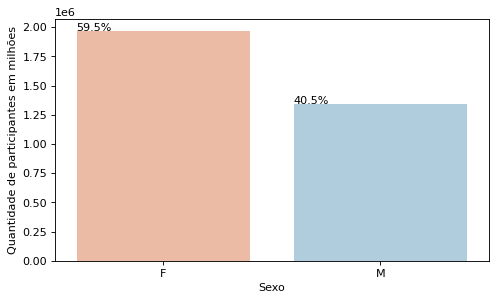

In [37]:
fig, ax = plt.subplots(dpi=80, figsize=(7, 4))

sns.countplot(data=dados, x= dados["TP_SEXO"],
             palette="RdBu", ax=ax)

for c in ax.containers:
    for v in c:
        bar_height = v.get_height()
        x_value = v.get_x()
        text = "{:.1%}".format(bar_height/len(dados))
        ax.annotate(xy=(x_value, bar_height), text=text)
ax.set_ylabel("Quantidade de participantes em milhões")
ax.set_xlabel("Sexo")

Text(0.5, 1.0, 'Idade dos participantes do ENEM 2019')

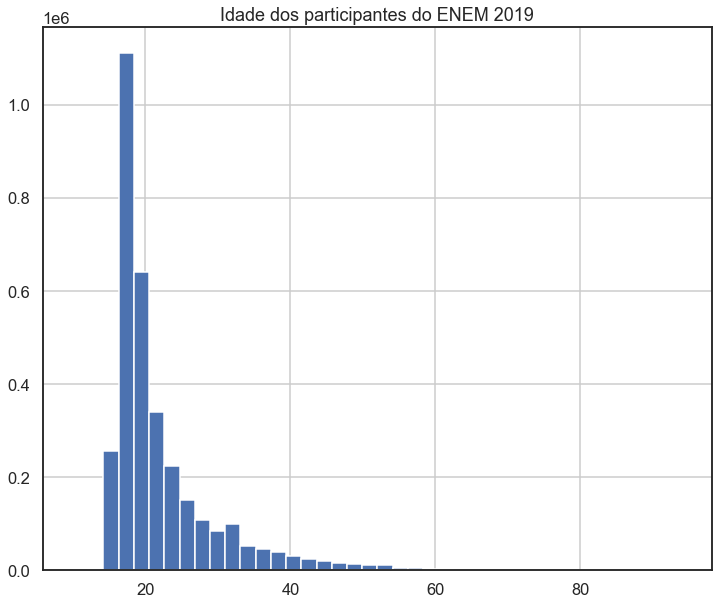

In [ ]:
sns.set_theme(style="white", context="talk")
dados["NU_IDADE"].hist(bins = 40, figsize = (12,10)).set_title("Idade dos participantes do ENEM 2019")

Text(0.5, 0, 'Etnia')

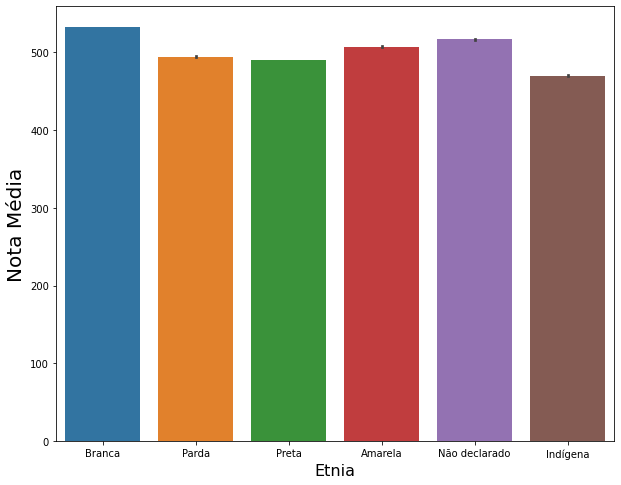

In [42]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.barplot(data=dados,
            x = dados['TP_COR_RACA'].map({0:'Não declarado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena'}), y = dados['nota_Media']);
plt.ylabel('Nota Média', fontsize=20)
plt.xlabel('Etnia', fontsize=16)

Text(0.5, 0, 'Modalidade')

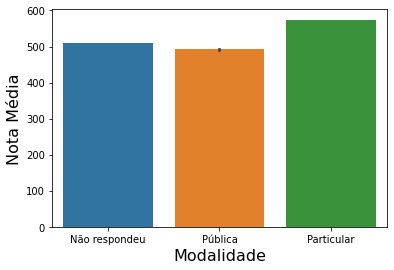

In [39]:
sns.barplot(data=dados, x = dados['TP_ESCOLA'].map({1:'Não respondeu',2:'Pública',3:'Particular'}), y = dados['nota_Media'])
plt.ylabel('Nota Média', fontsize=16)
plt.xlabel('Modalidade', fontsize=16)

### Fazer só com as colunas numéricas

In [65]:
### Fazer isso só com as colunas numéricas
#sns.pairplot(dados.iloc[:, :10])

In [63]:
#plt.figure(figsize=(50, 50))
#sns.heatmap(dados.corr(''), annot=True, fmt='.0%')
#IN_SEM_RECURSO

In [66]:
#plt.figure(figsize=(50, 50))
#sns.heatmap(dados.corr(), annot=True, fmt='.0%')

In [ ]:
"""
Como treinar qualquer modelo:

Iniciante:
* Train test split (se ja nao foi separado, nesse caso nao precisa)
* Treino com o dataset de treino
* Gera as predições com conjunto de teste (x)
* Calcula erros: RMSE, MAE, R2, etc.
* Compara os resultados, testa usar menos ou mais variáveis, etc.
* Começa so com as numéricas

Intermediário:
* Train test split (se ja nao foi separado, nesse caso nao precisa)
* Validação cruzada com k fold
* Gera as predições com o conjunto de teste (x)
* Calcula erros: RMSE, MAE, R2, etc.
* Compara os resultados de validação e treino


Repete o passo para varios modelos. Recomendado: LinearRegession para começar, LinearRegression com algumas variáveis criadas multiplicando, tirando raiz quadrada, polinômio, etc. de variáveis que existe (vc escolhe a função vendo qual tem a maior correlação com o y)
Depois se quiser pode usar Ridge, Lasso, ElasticNet, SVR, e fazer tuning de parâmetros 

Faz um passo para cada nota do enem
"""

## Análise Exploratória de Dados

In [ ]:
?pd.DataFrame.describe

In [ ]:
?pd.DataFrame.info

In [ ]:
?sns.pairplot

In [ ]:
?sns.heatmap
?pd.DataFrame.corr

## Treino de modelo

### Regressão Linear

In [ ]:
# TODO: Testar várias combinações de variáveis e potências, multiplicações, etc.

In [ ]:
?LinearRegression

In [ ]:
# TODO: Testar normalizar e usar Ridge e Lasso

In [ ]:
A = train[train.columns[train.columns.str.startswith('IN_SALA_ESPECIAL')]]

In [ ]:
print(A)

In [ ]:
b = 0
for i in train.columns:
  if i.isdecimal():
    b = i

In [ ]:
print(i)